<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Attrition 데이터를 대상으로 모델링를 진행합니다.
- 클래스 불균형 상태를 확인하고 다양한 방법으로 해결을 시도합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition2.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


In [4]:
# 하위 몇 개 행 확인
data.tail()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
1145,0,33,Research & Development,1,2,Life Sciences,Female,Research Director,4,Single,13458,1,3,15,1,3,15
1146,0,36,Research & Development,24,4,Life Sciences,Female,Laboratory Technician,2,Married,5674,7,3,11,3,3,9
1147,0,40,Research & Development,6,3,Life Sciences,Female,Manufacturing Director,3,Single,13237,7,3,22,3,3,20
1148,0,43,Human Resources,2,3,Life Sciences,Male,Human Resources,4,Single,3539,0,2,10,5,3,9
1149,0,32,Sales,8,2,Technical Degree,Female,Sales Executive,2,Married,5228,1,4,13,2,3,13


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1150 non-null   int64 
 1   Age                       1150 non-null   int64 
 2   Department                1150 non-null   object
 3   DistanceFromHome          1150 non-null   int64 
 4   Education                 1150 non-null   int64 
 5   EducationField            1150 non-null   object
 6   Gender                    1150 non-null   object
 7   JobRole                   1150 non-null   object
 8   JobSatisfaction           1150 non-null   int64 
 9   MaritalStatus             1150 non-null   object
 10  MonthlyIncome             1150 non-null   int64 
 11  NumCompaniesWorked        1150 non-null   int64 
 12  RelationshipSatisfaction  1150 non-null   int64 
 13  TotalWorkingYears         1150 non-null   int64 
 14  TrainingTimesLastYear   

0    1050
1     100
Name: Attrition, dtype: int64


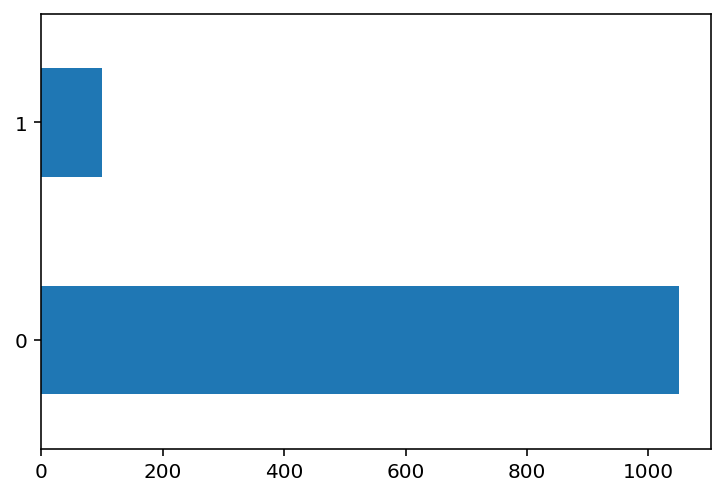

In [6]:
# Target 확인
print(data['Attrition'].value_counts())

# 시각화
data['Attrition'].value_counts().plot(kind='barh')
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

In [7]:
# 가변수화
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] 
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True) 

**2) x, y 분리**

In [8]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022) 

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

## 4.1.기본 모델링

- 원본 데이터를 사용해 Logistic Regression 알고리즘으로 모델링합니다.

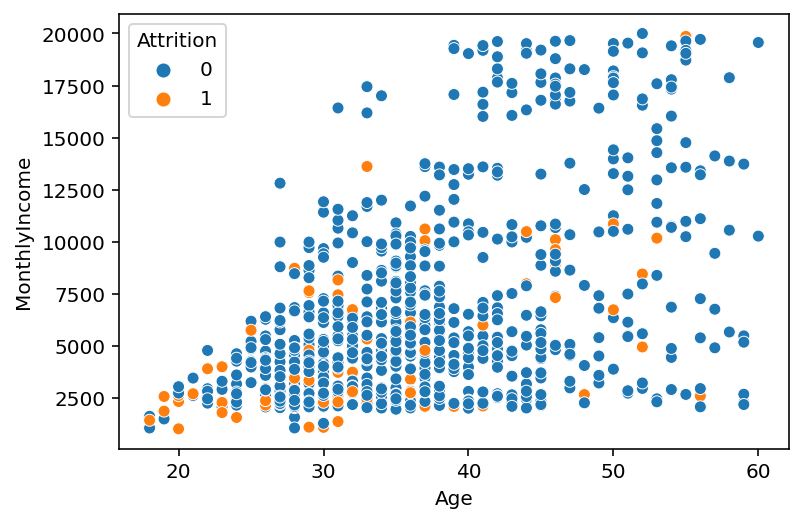

In [14]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=y_train, data=x_train)
plt.show()

In [15]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=2022)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[321   2]
 [ 19   3]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       323
           1       0.60      0.14      0.22        22

    accuracy                           0.94       345
   macro avg       0.77      0.57      0.60       345
weighted avg       0.92      0.94      0.92       345



## 4.2.Under Sampling

- Under Sampling 후 모델 성능을 확인합니다.

**1) Under Sampling**

- RandomUnderSampler를 사용해 Under Sampling 합니다.

In [10]:
!pip install imblearn

In [11]:
# 불러오기
from imblearn.under_sampling import RandomUnderSampler

# Under Sampling
under_sample = RandomUnderSampler()
u_x_train, u_y_train = under_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(u_y_train))

전: [727  78]
후: [78 78]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인합니다.

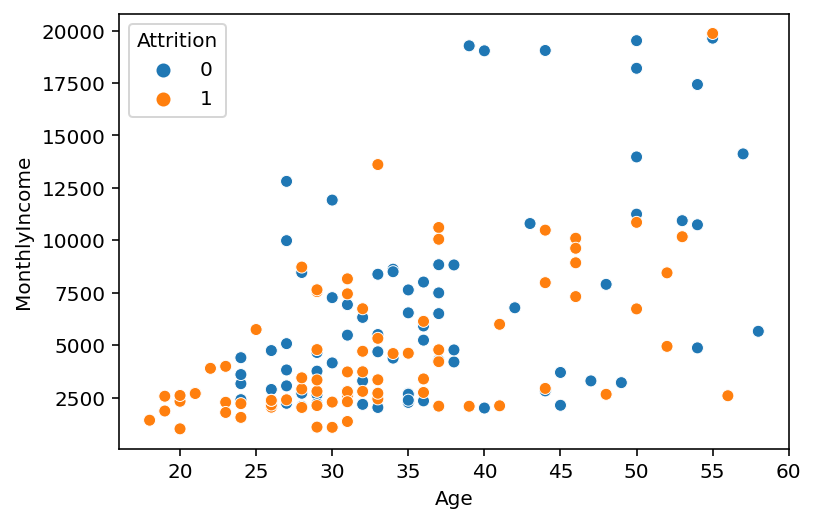

In [12]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=u_y_train, data=u_x_train)
plt.show()

**3) 모델 성능 확인**

- 다시 모델링해 성능을 확인합니다.

In [16]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=2022)

# 학습하기
model.fit(u_x_train, u_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[231  92]
 [  4  18]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       323
           1       0.16      0.82      0.27        22

    accuracy                           0.72       345
   macro avg       0.57      0.77      0.55       345
weighted avg       0.93      0.72      0.79       345



## 4.3.Over Sampling #1

- Over Sampling 후 모델 성능을 확인합니다.

**1) Over Sampling**

RandomOverSampler를 사용해 Over Sampling 합니다.

In [17]:
# 불러오기
from imblearn.over_sampling import RandomOverSampler

# Over Sampling
over_sample = RandomOverSampler()
o_x_train, o_y_train = over_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(o_y_train))

전: [727  78]
후: [727 727]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인합니다.

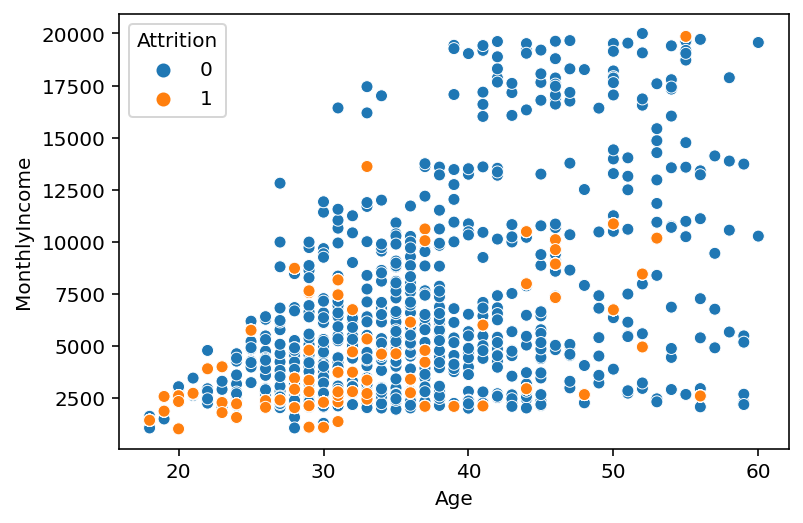

In [18]:
# 학습 데이터 분포 확인 (주황색 값들이 양이 작아보이지만 같은값이 여러개있는거임.)
sns.scatterplot(x='Age', y='MonthlyIncome', hue=o_y_train, data=o_x_train)
plt.show()

**3) 모델 성능 확인**

- 다시 모델링해 성능을 확인합니다.

In [19]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=2022)

# 학습하기
model.fit(o_x_train, o_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[289  34]
 [ 11  11]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       323
           1       0.24      0.50      0.33        22

    accuracy                           0.87       345
   macro avg       0.60      0.70      0.63       345
weighted avg       0.92      0.87      0.89       345



## 4.4.Over Sampling #2

- Over Sampling 후 모델 성능을 확인합니다.

**1) Over Sampling**

SMOTE를 사용해 Over Sampling 합니다.

In [20]:
# 불러오기
from imblearn.over_sampling import SMOTE

# Over Sampling
smote = SMOTE()
s_x_train, s_y_train = smote.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(s_y_train))

전: [727  78]
후: [727 727]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인합니다.

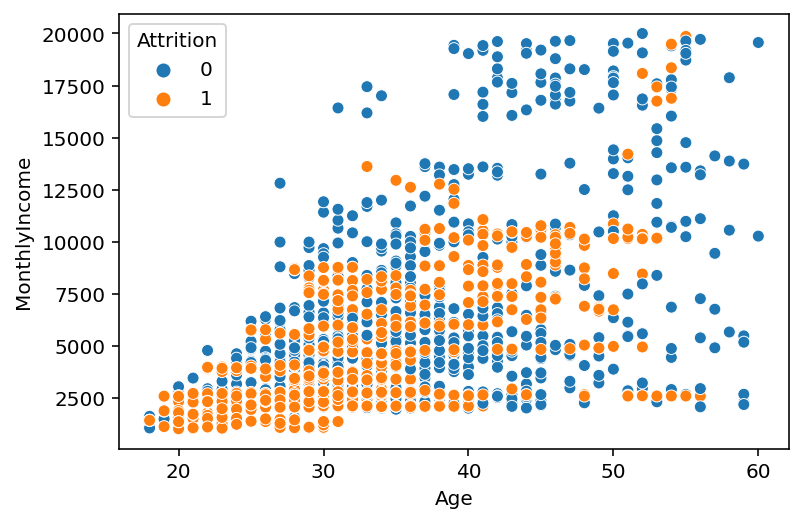

In [21]:
# 학습 데이터 분포 확인(아까와는 달리 약간 다른 값들(근접값)로 증식)
sns.scatterplot(x='Age', y='MonthlyIncome', hue=s_y_train, data=s_x_train)
plt.show()

**3) 모델 성능 확인**

- 다시 모델링해 성능을 확인합니다.

In [22]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=2022)

# 학습하기
model.fit(s_x_train, s_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[302  21]
 [ 14   8]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       323
           1       0.28      0.36      0.31        22

    accuracy                           0.90       345
   macro avg       0.62      0.65      0.63       345
weighted avg       0.91      0.90      0.90       345



## 4.5.Class Weight

- class_weight 하이터파라미터를 설정해 모델링한 후 성능을 확인합니다.

In [23]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=2022, class_weight='balanced')

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[303  20]
 [ 12  10]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       323
           1       0.33      0.45      0.38        22

    accuracy                           0.91       345
   macro avg       0.65      0.70      0.67       345
weighted avg       0.92      0.91      0.91       345

